## Training four models with ANN algorithem on four diffrent datasets and comparing them with each other

### SCdataset_augmented_pca info :

In [3]:
import numpy as np
import pandas as pd

In [4]:
df_pca = pd.read_csv('./scdataset_augmented_pca.csv')
df_pca.head()

,label,Unnamed: 0,bytecode_len,Weight bytecode_character_6,Weight bytecode_character_0,Weight bytecode_character_8,Weight bytecode_character_4,Weight bytecode_character_5,Weight bytecode_character_2,Weight bytecode_character_1,...,Opcode weight BYTE,Opcode weight SHL,Opcode weight SHR,Opcode weight SAR,Opcode weight SHA3,Opcode weight ADDRESS,Opcode weight BALANCE,Opcode weight ORIGIN,Opcode weight CALLER,Opcode weight CALLVALUE
0,1,-18593.541370,-3790.875814,-138.974332,-91.802049,12.378125,3.447678,10.138003,10.654542,-1.873592,...,-0.000029,0.000137,0.001712,0.000145,0.000407,-0.001050,0.000370,0.000266,-0.000974,-0.000517
1,1,-18592.757719,-3791.210512,-152.913929,-92.559204,12.408262,3.430857,10.158206,10.644315,-1.771356,...,0.000313,0.000423,0.004985,-0.000002,0.000086,-0.000765,0.000582,0.000483,0.000068,0.000131
2,1,-17910.247278,5483.089822,1089.656944,1328.476865,105.730463,57.336378,-34.509002,10.313061,-9.811058,...,0.000103,-0.001249,-0.006844,0.000511,0.001433,0.002279,-0.000945,0.000661,0.002517,0.001490
3,1,-18292.621073,-970.489277,914.759864,132.257967,1.488585,-55.271777,14.903369,12.570071,4.274714,...,0.002983,0.004366,0.027147,-0.000023,-0.001055,0.012798,-0.002443,-0.014268,0.003822,-0.008043
4,1,-17944.107622,3809.662043,426.495360,283.519431,-28.989591,45.310233,-17.349726,-9.266915,3.454266,...,0.000401,-0.000803,-0.000682,0.000293,0.000743,0.002392,-0.003929,0.004556,0.002533,0.001894


In [5]:
df_pca.shape

(52915, 71)

In [6]:
df_pca['label'].value_counts()

label
0    26915
1    26000
Name: count, dtype: int64

### Preproccesing

In [7]:
x = df_pca.drop('label', axis=1)
y = df_pca['label']

In [8]:
x

,Unnamed: 0,bytecode_len,Weight bytecode_character_6,Weight bytecode_character_0,Weight bytecode_character_8,Weight bytecode_character_4,Weight bytecode_character_5,Weight bytecode_character_2,Weight bytecode_character_1,Weight bytecode_character_a,...,Opcode weight BYTE,Opcode weight SHL,Opcode weight SHR,Opcode weight SAR,Opcode weight SHA3,Opcode weight ADDRESS,Opcode weight BALANCE,Opcode weight ORIGIN,Opcode weight CALLER,Opcode weight CALLVALUE
0,-18593.541370,-3790.875814,-138.974332,-91.802049,12.378125,3.447678,10.138003,10.654542,-1.873592,0.150567,...,-0.000029,0.000137,0.001712,0.000145,0.000407,-0.001050,0.000370,0.000266,-0.000974,-0.000517
1,-18592.757719,-3791.210512,-152.913929,-92.559204,12.408262,3.430857,10.158206,10.644315,-1.771356,-0.004859,...,0.000313,0.000423,0.004985,-0.000002,0.000086,-0.000765,0.000582,0.000483,0.000068,0.000131
2,-17910.247278,5483.089822,1089.656944,1328.476865,105.730463,57.336378,-34.509002,10.313061,-9.811058,16.841042,...,0.000103,-0.001249,-0.006844,0.000511,0.001433,0.002279,-0.000945,0.000661,0.002517,0.001490
3,-18292.621073,-970.489277,914.759864,132.257967,1.488585,-55.271777,14.903369,12.570071,4.274714,-28.372130,...,0.002983,0.004366,0.027147,-0.000023,-0.001055,0.012798,-0.002443,-0.014268,0.003822,-0.008043
4,-17944.107622,3809.662043,426.495360,283.519431,-28.989591,45.310233,-17.349726,-9.266915,3.454266,6.162737,...,0.000401,-0.000803,-0.000682,0.000293,0.000743,0.002392,-0.003929,0.004556,0.002533,0.001894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52910,15144.460013,-4026.866169,-620.863935,-367.719878,-27.555636,-19.819304,-10.738579,-20.091275,6.287269,-7.749637,...,-0.000892,-0.002015,-0.017116,-0.000154,0.000115,0.001916,-0.000151,-0.000911,-0.001229,-0.002075
52911,13517.358095,-5418.167371,436.830855,-163.893606,-3.375523,-6.777695,-3.418151,8.641210,-9.739129,0.292340,...,0.000107,-0.000734,-0.009902,-0.000777,-0.000753,0.018675,-0.001606,0.011577,0.005916,-0.006062
52912,14467.047684,-5473.575569,468.875751,-163.555933,-6.932170,-5.752227,-3.799309,8.365047,-4.860775,0.832913,...,-0.000585,-0.000682,-0.005990,-0.000104,-0.000257,0.002651,0.001091,0.005951,0.006829,-0.000505
52913,15481.677909,-4044.975186,-566.492273,-363.591018,-26.671330,-21.669856,-9.563522,-20.658614,9.610103,-8.157332,...,-0.000872,-0.001546,-0.014799,-0.000164,0.000072,0.001996,-0.000155,-0.000513,-0.001369,-0.001100


In [9]:
y

0        1
1        1
2        1
3        1
4        1
        ..
52910    1
52911    1
52912    1
52913    1
52914    1
Name: label, Length: 52915, dtype: int64

In [10]:
x = np.array(x)
y = np.array(y)

In [11]:
x

array([[-1.85935414e+04, -3.79087581e+03, -1.38974332e+02, ...,
         2.65780453e-04, -9.74390204e-04, -5.17436809e-04],
       [-1.85927577e+04, -3.79121051e+03, -1.52913929e+02, ...,
         4.83415024e-04,  6.83272189e-05,  1.31466317e-04],
       [-1.79102473e+04,  5.48308982e+03,  1.08965694e+03, ...,
         6.61311640e-04,  2.51723207e-03,  1.49020268e-03],
       ...,
       [ 1.44670477e+04, -5.47357557e+03,  4.68875751e+02, ...,
         5.95090275e-03,  6.82884699e-03, -5.04696957e-04],
       [ 1.54816779e+04, -4.04497519e+03, -5.66492273e+02, ...,
        -5.13046034e-04, -1.36894020e-03, -1.09959207e-03],
       [ 1.61340874e+04,  1.33566510e+04, -2.37820783e+02, ...,
        -1.93435402e-03,  8.93293468e-04, -2.22475958e-03]])

In [12]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Normalizing Data

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [14]:
x

array([[-2.06960036, -0.52878281, -0.13277157, ...,  0.04056768,
        -0.18728984, -0.09929623],
       [-2.06952782, -0.52882831, -0.14524021, ...,  0.07863982,
         0.00774348,  0.03464243],
       [-2.00634739,  0.73188376,  0.96620974, ...,  0.10976036,
         0.46579478,  0.3150962 ],
       ...,
       [ 0.99083979, -0.75752242,  0.4109358 , ...,  1.03510085,
         1.27225354, -0.09666662],
       [ 1.08476477, -0.56332408, -0.51517615, ..., -0.0956772 ,
        -0.26108778, -0.21945761],
       [ 1.14515874,  1.80218483, -0.22118736, ..., -0.34431528,
         0.16204791, -0.45170095]])

### Train/Test

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [16]:
x_train.shape, y_train.shape

((42332, 70), (42332,))

In [17]:
x_test.shape

(10583, 70)

### ANN algorithm  on scdataset_augmented_pca

In [18]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=128, max_iter=200)
model.fit(x_train, y_train)

f:\Programming\python\python learning and projects_summer 1403\machinlearning course_youtube\Codes\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=128)

In [19]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,mean_squared_error, f1_score, roc_auc_score

acc_train_pca = accuracy_score(y_train, y_pred_train)
acc_test_pca = accuracy_score(y_test, y_pred_test)
loss_pca = mean_squared_error(y_test, y_pred_test)


acc_test_pca, acc_train_pca, loss_pca

(0.9497307001795332, 0.982731739582349, 0.05026929982046679)

In [21]:
p_pca = precision_score(y_test, y_pred_test)
r_pca = recall_score(y_test,y_pred_test)
f1_pca = f1_score(y_test, y_pred_test)
ra_pca = roc_auc_score(y_test, y_pred_test)


r_pca,p_pca, f1_pca, ra_pca

(0.9628647214854111, 0.937984496124031, 0.9502617801047121, 0.9497641232309243)

### SCdataset_augmented_ig info :

In [22]:
df_ig = pd.read_csv('./scdataset_augmented_ig.csv')
df_ig.head()

,label,Unnamed: 0,bytecode_len,Weight bytecode_character_6,Weight bytecode_character_0,Weight bytecode_character_8,Weight bytecode_character_4,Weight bytecode_character_5,Weight bytecode_character_2,Weight bytecode_character_1,...,Opcode weight SWAP1,Opcode weight SWAP2,Opcode weight SWAP3,Opcode weight SWAP4,Opcode weight LOG1,Opcode weight LOG3,Opcode weight CALL,Opcode weight RETURN,Opcode weight REVERT,Opcode weight INVALID
0,1,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,117,8370,0.059498,0.151732,0.036201,0.013381,0.055078,0.039904,0.069534,...,0.081346,0.034862,0.013456,0.000612,0.000612,0.003058,0.000000,0.005505,0.009174,0.001223
3,1,120,2586,0.069606,0.176334,0.036736,0.030936,0.064192,0.020495,0.080046,...,0.082863,0.015066,0.001883,0.000000,0.005650,0.003766,0.001883,0.005650,0.022599,0.000000
4,1,193,7002,0.068695,0.184090,0.048272,0.017566,0.069123,0.043559,0.088546,...,0.076372,0.035800,0.011933,0.000597,0.000597,0.001790,0.000000,0.005967,0.009547,0.001193


In [23]:
df_ig.shape

(52915, 76)

In [24]:
df_ig['label'].value_counts()

label
0    26915
1    26000
Name: count, dtype: int64

### Preproccesing

In [25]:
x = df_ig.drop('label', axis=1)
y = df_ig['label']

In [26]:
x

,Unnamed: 0,bytecode_len,Weight bytecode_character_6,Weight bytecode_character_0,Weight bytecode_character_8,Weight bytecode_character_4,Weight bytecode_character_5,Weight bytecode_character_2,Weight bytecode_character_1,Weight bytecode_character_a,...,Opcode weight SWAP1,Opcode weight SWAP2,Opcode weight SWAP3,Opcode weight SWAP4,Opcode weight LOG1,Opcode weight LOG3,Opcode weight CALL,Opcode weight RETURN,Opcode weight REVERT,Opcode weight INVALID
0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,117,8370,0.059498,0.151732,0.036201,0.013381,0.055078,0.039904,0.069534,0.004182,...,0.081346,0.034862,0.013456,0.000612,0.000612,0.003058,0.000000,0.005505,0.009174,0.001223
3,120,2586,0.069606,0.176334,0.036736,0.030936,0.064192,0.020495,0.080046,0.017015,...,0.082863,0.015066,0.001883,0.000000,0.005650,0.003766,0.001883,0.005650,0.022599,0.000000
4,193,7002,0.068695,0.184090,0.048272,0.017566,0.069123,0.043559,0.088546,0.006427,...,0.076372,0.035800,0.011933,0.000597,0.000597,0.001790,0.000000,0.005967,0.009547,0.001193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52910,33698,1660,0.074800,0.251340,0.052911,0.022959,0.092906,0.043340,0.091566,0.007798,...,0.090318,0.053370,0.028738,0.002053,0.002053,0.000000,0.000000,0.014369,0.016421,0.000000
52911,32140,240,0.075734,0.340933,0.069365,0.037500,0.066667,0.065933,0.059304,0.026468,...,0.000000,0.000000,0.000000,0.000000,0.021124,0.000000,0.000000,0.021124,0.021124,0.021124
52912,33167,357,0.097086,0.365758,0.053916,0.047180,0.087809,0.041515,0.051911,0.016387,...,0.024432,0.016288,0.000000,0.000000,0.012507,0.000000,0.000000,0.020652,0.028796,0.004363
52913,34035,1660,0.074178,0.251726,0.049642,0.024096,0.093976,0.042853,0.091290,0.008955,...,0.090571,0.053520,0.028818,0.002058,0.002334,0.000000,0.000000,0.014409,0.016468,0.000000


In [27]:
y

0        1
1        1
2        1
3        1
4        1
        ..
52910    1
52911    1
52912    1
52913    1
52914    1
Name: label, Length: 52915, dtype: int64

In [28]:
x = np.array(x)
y = np.array(y)

In [29]:
x

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.17000000e+02, 8.37000000e+03, 5.94982079e-02, ...,
        5.50458716e-03, 9.17431193e-03, 1.22324159e-03],
       ...,
       [3.31670000e+04, 3.57000000e+02, 9.70862624e-02, ...,
        2.06515231e-02, 2.87955618e-02, 4.36344575e-03],
       [3.40350000e+04, 1.66000000e+03, 7.41779774e-02, ...,
        1.44091016e-02, 1.64675447e-02, 0.00000000e+00],
       [3.36580000e+04, 1.79460000e+04, 7.84774596e-02, ...,
        3.16975555e-03, 9.27380759e-03, 2.78119665e-03]])

In [30]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Normalizing Data

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [32]:
x

array([[-2.04819123, -0.70058358, -1.70710777, ..., -0.99991516,
        -1.1225938 , -0.5110709 ],
       [-2.04809848, -0.70058358, -1.70710777, ..., -0.99991516,
        -1.1225938 , -0.5110709 ],
       [-2.03743283,  0.52457082,  0.09441752, ..., -0.25970224,
        -0.23273141, -0.32660328],
       ...,
       [ 1.02778347, -0.64832789,  1.23253298, ...,  1.77713675,
         1.6704317 ,  0.14694665],
       [ 1.10828598, -0.45760194,  0.53890109, ...,  0.93770576,
         0.4746757 , -0.5110709 ],
       [ 1.07332118,  1.92625283,  0.6690836 , ..., -0.57367175,
        -0.22308083, -0.09166011]])

### Train/Test

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [34]:
x_train.shape, y_train.shape

((42332, 75), (42332,))

In [35]:
x_test.shape

(10583, 75)

### ANN algorithm  on scdataset_augmented_ig

In [36]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=128, max_iter=200)
model.fit(x_train, y_train)

f:\Programming\python\python learning and projects_summer 1403\machinlearning course_youtube\Codes\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=128)

In [37]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,mean_squared_error

acc_train_ig = accuracy_score(y_train, y_pred_train)
acc_test_ig = accuracy_score(y_test, y_pred_test)
loss_ig = mean_squared_error(y_test, y_pred_test)


acc_test_ig, acc_train_ig, loss_ig

(0.9560616082396296, 0.9740621751866201, 0.043938391760370406)

In [39]:
p_ig = precision_score(y_test, y_pred_test)
r_ig = recall_score(y_test,y_pred_test)
f1_ig = f1_score(y_test, y_pred_test)
ra_ig = roc_auc_score(y_test, y_pred_test)

r_ig, p_ig, f1_ig, ra_ig

(0.964319248826291, 0.9491682070240296, 0.9566837447601304, 0.9560089967980828)

--------------------------

### SCdataset_pcathenig_augmented info :

In [2]:
import numpy as np
import pandas as pd

In [3]:
df_pcathenig = pd.read_csv('./scdataset_pcathenig_augmented.csv')
df_pcathenig.head()

,label,Unnamed: 0,bytecode_len,Weight bytecode_character_6,Weight bytecode_character_0,Weight bytecode_character_8,Weight bytecode_character_4,Weight bytecode_character_5,Weight bytecode_character_2,Weight bytecode_character_1,...,Opcode weight EXP,Opcode weight LT,Opcode weight GT,Opcode weight EQ,Opcode weight ISZERO,Opcode weight AND,Opcode weight OR,Opcode weight NOT,Opcode weight CALLER,Opcode weight CALLVALUE
0,1,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,117,8370,0.059498,0.151732,0.036201,0.013381,0.055078,0.039904,0.069534,...,0.000000,0.001223,0.003058,0.006116,0.031193,0.061774,0.000000,0.000000,0.011621,0.005505
3,1,120,2586,0.069606,0.176334,0.036736,0.030936,0.064192,0.020495,0.080046,...,0.024482,0.001883,0.000000,0.016949,0.054614,0.054614,0.009416,0.009416,0.007533,0.009416
4,1,193,7002,0.068695,0.184090,0.048272,0.017566,0.069123,0.043559,0.088546,...,0.001790,0.003580,0.003580,0.006563,0.031623,0.048926,0.000000,0.001193,0.005370,0.005967


In [4]:
df_pcathenig.shape

(52915, 38)

In [5]:
df_pcathenig['label'].value_counts()

label
0    26915
1    26000
Name: count, dtype: int64

### Preproccesing

In [6]:
x = df_pcathenig.drop('label', axis=1)
y = df_pcathenig['label']

In [7]:
x

,Unnamed: 0,bytecode_len,Weight bytecode_character_6,Weight bytecode_character_0,Weight bytecode_character_8,Weight bytecode_character_4,Weight bytecode_character_5,Weight bytecode_character_2,Weight bytecode_character_1,Weight bytecode_character_a,...,Opcode weight EXP,Opcode weight LT,Opcode weight GT,Opcode weight EQ,Opcode weight ISZERO,Opcode weight AND,Opcode weight OR,Opcode weight NOT,Opcode weight CALLER,Opcode weight CALLVALUE
0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,117,8370,0.059498,0.151732,0.036201,0.013381,0.055078,0.039904,0.069534,0.004182,...,0.000000,0.001223,0.003058,0.006116,0.031193,0.061774,0.000000,0.000000,0.011621,0.005505
3,120,2586,0.069606,0.176334,0.036736,0.030936,0.064192,0.020495,0.080046,0.017015,...,0.024482,0.001883,0.000000,0.016949,0.054614,0.054614,0.009416,0.009416,0.007533,0.009416
4,193,7002,0.068695,0.184090,0.048272,0.017566,0.069123,0.043559,0.088546,0.006427,...,0.001790,0.003580,0.003580,0.006563,0.031623,0.048926,0.000000,0.001193,0.005370,0.005967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52910,33698,1660,0.074800,0.251340,0.052911,0.022959,0.092906,0.043340,0.091566,0.007798,...,0.000000,0.002053,0.000000,0.012316,0.039001,0.016421,0.000000,0.000000,0.000000,0.014369
52911,32140,240,0.075734,0.340933,0.069365,0.037500,0.066667,0.065933,0.059304,0.026468,...,0.000000,0.000000,0.000000,0.063371,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
52912,33167,357,0.097086,0.365758,0.053916,0.047180,0.087809,0.041515,0.051911,0.016387,...,0.000000,0.008144,0.000000,0.021234,0.016288,0.008144,0.000000,0.000000,0.004363,0.016288
52913,34035,1660,0.074178,0.251726,0.049642,0.024096,0.093976,0.042853,0.091290,0.008955,...,0.000000,0.002334,0.000000,0.012351,0.039110,0.016468,0.000000,0.000000,0.000000,0.014409


In [8]:
y

0        1
1        1
2        1
3        1
4        1
        ..
52910    1
52911    1
52912    1
52913    1
52914    1
Name: label, Length: 52915, dtype: int64

In [9]:
x = np.array(x)
y = np.array(y)

In [10]:
x

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.17000000e+02, 8.37000000e+03, 5.94982079e-02, ...,
        0.00000000e+00, 1.16207951e-02, 5.50458716e-03],
       ...,
       [3.31670000e+04, 3.57000000e+02, 9.70862624e-02, ...,
        0.00000000e+00, 4.36344575e-03, 1.62880773e-02],
       [3.40350000e+04, 1.66000000e+03, 7.41779774e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.44091016e-02],
       [3.36580000e+04, 1.79460000e+04, 7.84774596e-02, ...,
        4.98405514e-03, 2.07481943e-03, 4.60176143e-03]])

In [11]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Normalizing Data

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [13]:
x

array([[-2.04819116, -0.70058358, -1.7071084 , ..., -0.49377454,
        -0.80753552, -0.94632854],
       [-2.04809842, -0.70058358, -1.7071084 , ..., -0.49377454,
        -0.80753552, -0.94632854],
       [-2.03743276,  0.52457082,  0.09441824, ..., -0.49377454,
         1.8132125 , -0.0497681 ],
       ...,
       [ 1.02778333, -0.64832789,  1.23253456, ..., -0.49377454,
         0.17651864,  1.70659444],
       [ 1.10828582, -0.45760194,  0.53890215, ..., -0.49377454,
        -0.80753552,  1.40055599],
       [ 1.07332103,  1.92625283,  0.66908475, ...,  0.80619995,
        -0.33961755, -0.19681598]])

### Train/Test

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
x_train.shape, y_train.shape

((42332, 37), (42332,))

In [16]:
x_test.shape

(10583, 37)

### ANN algorithm  on scdataset_pcathenig_augmented

In [17]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=128, max_iter=200)
model.fit(x_train, y_train)

f:\Programming\python\python learning and projects_summer 1403\machinlearning course_youtube\Codes\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=128)

f:\Programming\python\python learning and projects_summer 1403\machinlearning course_youtube\Codes\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


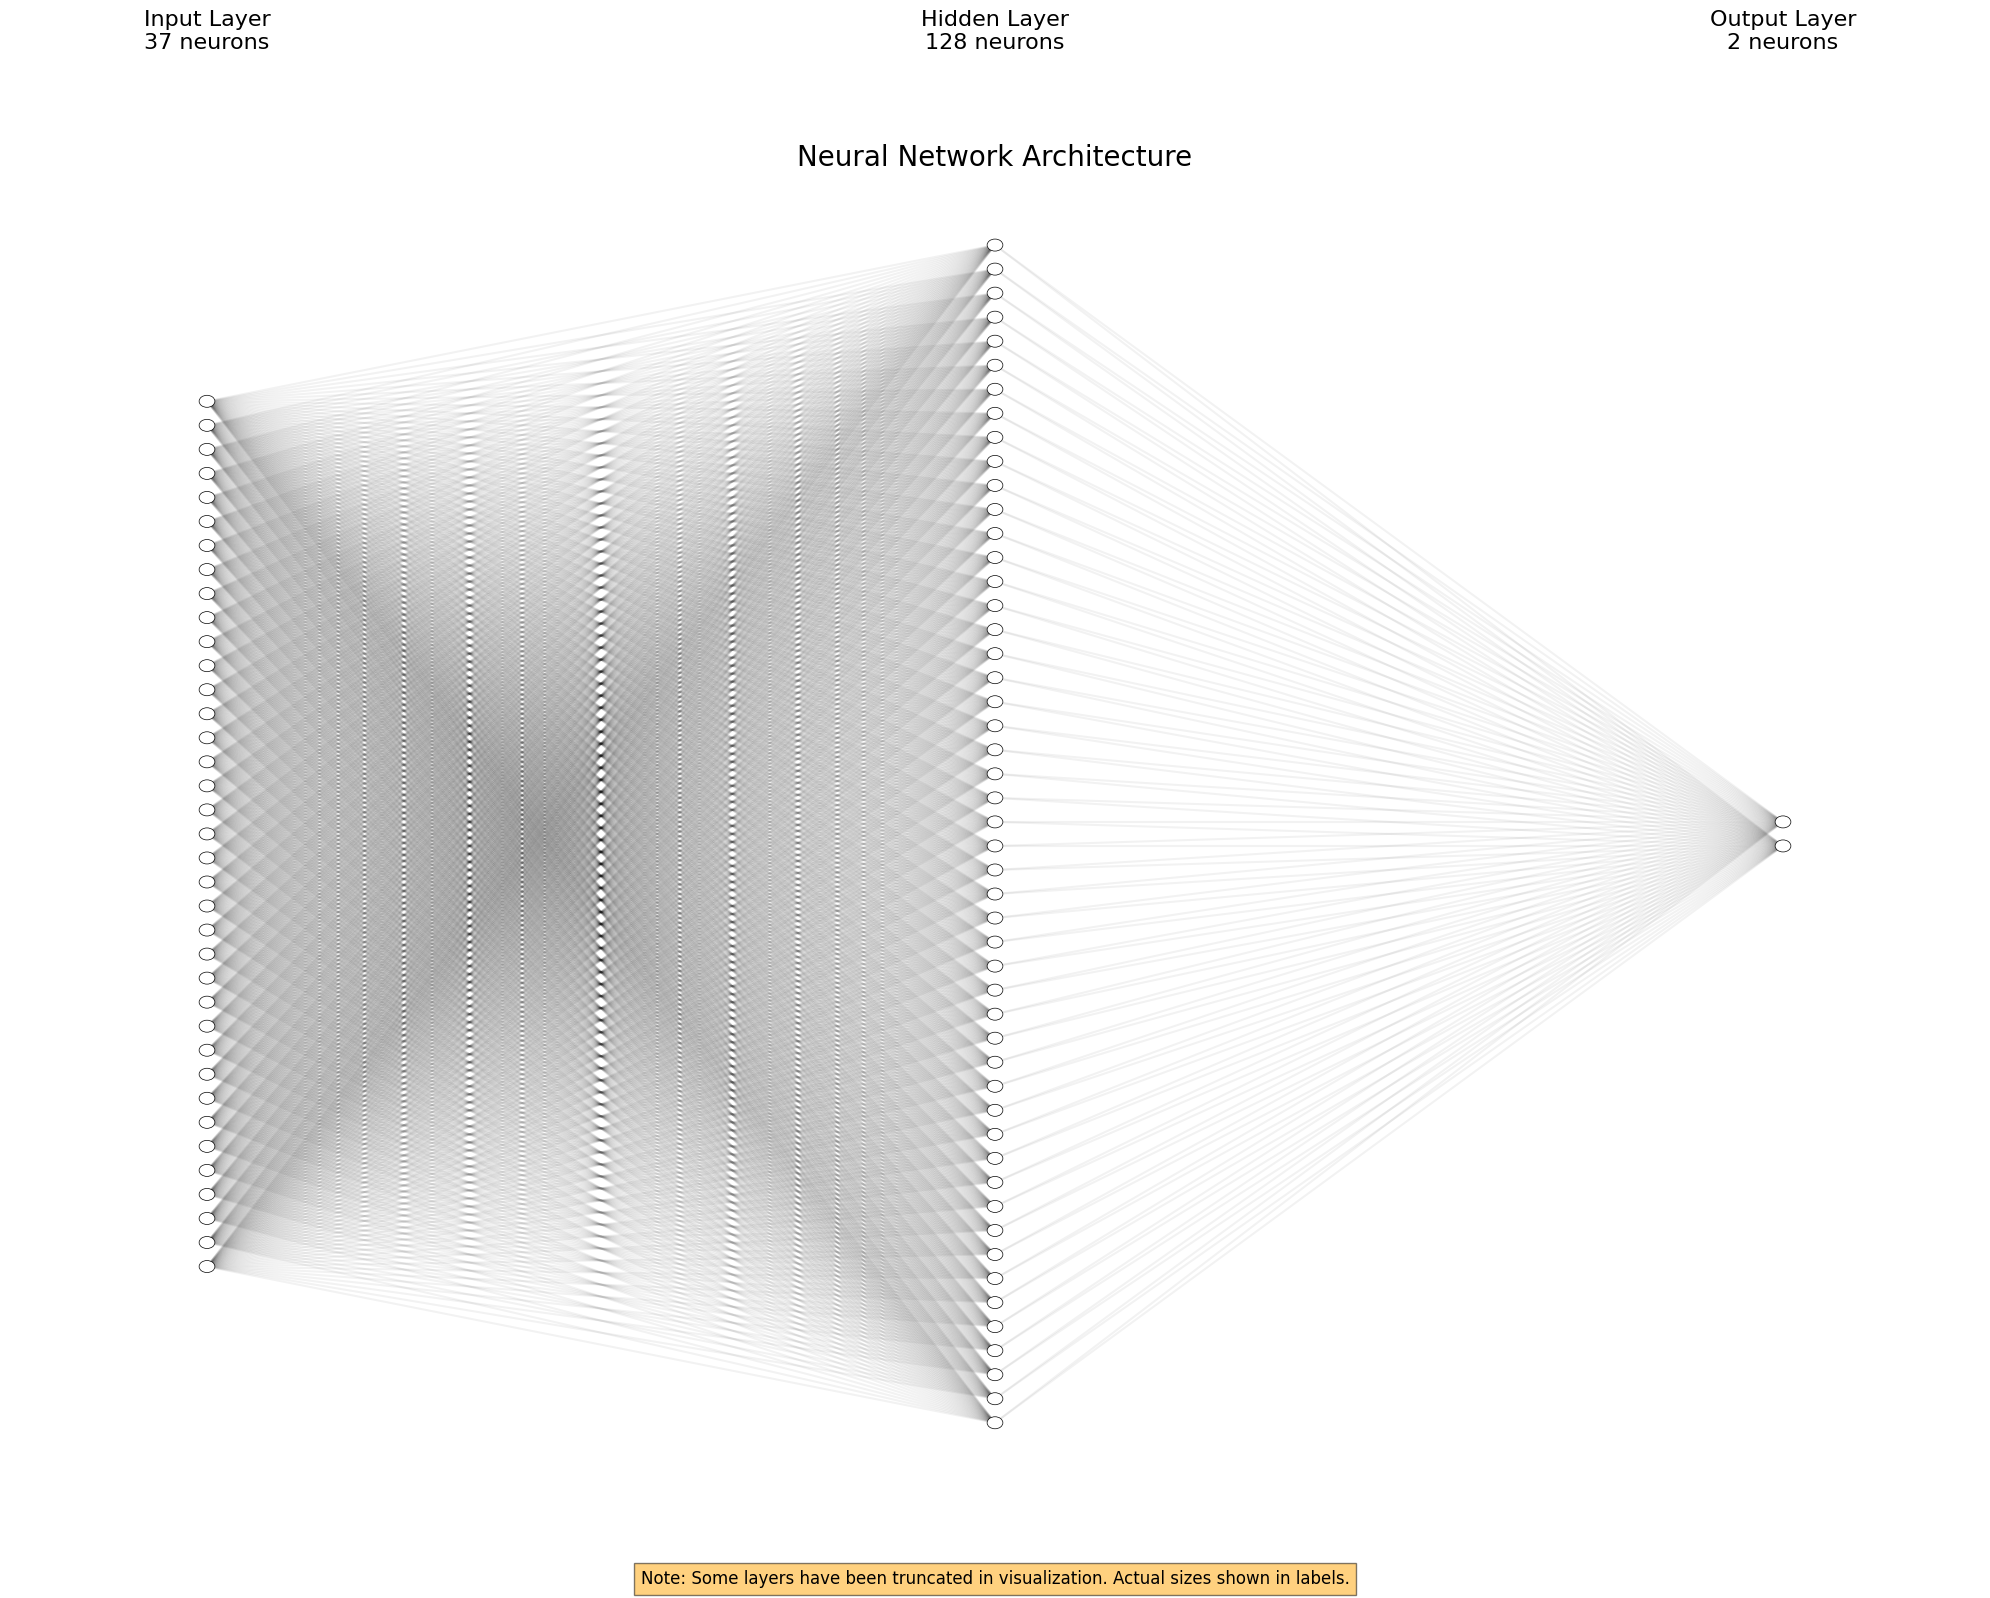

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Assuming you have already defined x and y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model
model = MLPClassifier(hidden_layer_sizes=(128,), max_iter=200, random_state=42)
model.fit(x_train, y_train)

def draw_neural_network(ax, layer_sizes):
    left = .1
    right = .9
    bottom = .1
    top = .9
    
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4, linewidth=0.5)
            ax.add_artist(circle)
    
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k', alpha=0.05)
                ax.add_artist(line)

# Set up the figure and axis
fig = plt.figure(figsize=(20, 16))
ax = fig.gca()
ax.axis('off')

# Define the network structure
input_layer_size = 37  # Adjusted to 37 for your dataset
hidden_layer_size = model.hidden_layer_sizes[0]
output_layer_size = len(np.unique(y))

# Adjust layer sizes for visualization
max_neurons_to_show = 50
layer_sizes = [
    min(input_layer_size, max_neurons_to_show),
    min(hidden_layer_size, max_neurons_to_show),
    min(output_layer_size, max_neurons_to_show)
]

# Draw the neural network
draw_neural_network(ax, layer_sizes)

# Add labels
plt.text(0.1, 1.02, f'Input Layer\n{input_layer_size} neurons', ha='center', va='bottom', fontsize=16)
plt.text(0.5, 1.02, f'Hidden Layer\n{hidden_layer_size} neurons', ha='center', va='bottom', fontsize=16)
plt.text(0.9, 1.02, f'Output Layer\n{output_layer_size} neurons', ha='center', va='bottom', fontsize=16)

# Add title below the layer labels
plt.text(0.5, 0.95, "Neural Network Architecture", fontsize=20, ha='center', va='center')

# Add a note if layers were truncated
if any(actual > shown for actual, shown in zip([input_layer_size, hidden_layer_size, output_layer_size], layer_sizes)):
    plt.figtext(0.5, 0.01, f"Note: Some layers have been truncated in visualization. Actual sizes shown in labels.", 
                ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.show()


In [56]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,mean_squared_error

acc_train_pcathenig = accuracy_score(y_train, y_pred_train)
acc_test_pcathenig = accuracy_score(y_test, y_pred_test)
loss_pcathenig = mean_squared_error(y_test, y_pred_test)

In [58]:
p_pcathenig = precision_score(y_test, y_pred_test)
r_pcathenig = recall_score(y_test,y_pred_test)
f1_pcathenig = f1_score(y_test, y_pred_test)
ra_pcathenig = roc_auc_score(y_test, y_pred_test)

r_pcathenig,p_pcathenig, f1_pcathenig, ra_pcathenig

(0.9549188156638013,
 0.9516466780887112,
 0.9532799389778794,
 0.9537122126187368)

### SCdataset_igthenpca_augmented info :

In [59]:
df_igthenpca = pd.read_csv('./scdataset_igthenpca_augmented.csv')
df_igthenpca.head()

,label,Unnamed: 0,bytecode_len,Weight bytecode_character_6,Weight bytecode_character_0,Weight bytecode_character_8,Weight bytecode_character_4,Weight bytecode_character_5,Weight bytecode_character_2,Weight bytecode_character_1,...,Opcode weight DUP5,Opcode weight DUP6,Opcode weight DUP7,Opcode weight DUP8,Opcode weight DUP9,Opcode weight SWAP1,Opcode weight SWAP2,Opcode weight SWAP3,Opcode weight SWAP4,Opcode weight LOG1
0,1,-18584.541122,-3768.024353,-139.440572,-87.302500,12.654108,-1.993456,-0.025376,0.006328,-0.001110,...,-0.000006,0.000002,-0.000012,0.000007,0.000046,0.000006,-0.000002,4.092177e-07,-0.000046,0.000003
1,1,-18583.757936,-3768.362461,-153.432506,-88.008081,12.670094,-1.991639,-0.025707,0.006324,-0.001117,...,-0.000007,0.000003,-0.000013,0.000007,0.000046,0.000007,-0.000003,2.718765e-07,-0.000046,0.000003
2,1,-17919.360735,5450.035355,1095.660653,1282.119285,102.029856,0.037189,0.095841,0.041233,0.009434,...,-0.000127,0.000148,0.000008,0.000003,0.000004,-0.000048,0.000103,7.515686e-05,-0.000062,0.000078
3,1,-18289.524987,-971.859776,915.011112,123.200352,-6.563664,0.785214,0.189752,0.030554,-0.033110,...,0.000321,0.000009,-0.000353,0.000243,0.001821,-0.000328,0.001025,1.108894e-03,0.000193,0.001667
4,1,-17951.709027,3753.622539,427.451800,278.449355,-19.401829,0.466487,0.092458,0.021495,0.006596,...,0.000395,-0.000592,0.000021,0.000605,-0.000448,-0.000108,0.000144,3.200167e-04,0.000014,0.000150


In [60]:
df_igthenpca.shape

(52915, 71)

In [61]:
df_igthenpca['label'].value_counts()

label
0    26915
1    26000
Name: count, dtype: int64

### Preproccesing

In [62]:
x = df_igthenpca.drop('label', axis=1)
y = df_igthenpca['label']

In [63]:
x

,Unnamed: 0,bytecode_len,Weight bytecode_character_6,Weight bytecode_character_0,Weight bytecode_character_8,Weight bytecode_character_4,Weight bytecode_character_5,Weight bytecode_character_2,Weight bytecode_character_1,Weight bytecode_character_a,...,Opcode weight DUP5,Opcode weight DUP6,Opcode weight DUP7,Opcode weight DUP8,Opcode weight DUP9,Opcode weight SWAP1,Opcode weight SWAP2,Opcode weight SWAP3,Opcode weight SWAP4,Opcode weight LOG1
0,-18584.541122,-3768.024353,-139.440572,-87.302500,12.654108,-1.993456,-0.025376,0.006328,-0.001110,0.000184,...,-0.000006,0.000002,-0.000012,0.000007,0.000046,0.000006,-0.000002,4.092177e-07,-0.000046,0.000003
1,-18583.757936,-3768.362461,-153.432506,-88.008081,12.670094,-1.991639,-0.025707,0.006324,-0.001117,0.000214,...,-0.000007,0.000003,-0.000013,0.000007,0.000046,0.000007,-0.000003,2.718765e-07,-0.000046,0.000003
2,-17919.360735,5450.035355,1095.660653,1282.119285,102.029856,0.037189,0.095841,0.041233,0.009434,0.020725,...,-0.000127,0.000148,0.000008,0.000003,0.000004,-0.000048,0.000103,7.515686e-05,-0.000062,0.000078
3,-18289.524987,-971.859776,915.011112,123.200352,-6.563664,0.785214,0.189752,0.030554,-0.033110,-0.071997,...,0.000321,0.000009,-0.000353,0.000243,0.001821,-0.000328,0.001025,1.108894e-03,0.000193,0.001667
4,-17951.709027,3753.622539,427.451800,278.449355,-19.401829,0.466487,0.092458,0.021495,0.006596,0.018783,...,0.000395,-0.000592,0.000021,0.000605,-0.000448,-0.000108,0.000144,3.200167e-04,0.000014,0.000150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52910,15152.323216,-3977.201862,-622.266277,-355.361272,-30.884159,1.316927,0.045829,-0.097314,-0.017251,0.001424,...,-0.000017,-0.000453,0.000195,-0.000007,-0.000258,0.000194,-0.000027,8.971259e-05,0.000510,-0.000097
52911,13528.703087,-5347.820464,436.060097,-159.531907,-7.218938,1.351492,-0.199526,0.079594,0.032059,-0.002045,...,-0.001952,-0.000577,-0.001128,-0.000145,-0.001082,0.000891,0.000462,-2.592587e-04,-0.000451,0.001028
52912,14564.367943,-5278.885470,672.199065,-181.020974,3.167211,1.200590,-0.136406,0.009027,0.000642,-0.006565,...,-0.001379,0.001793,-0.001040,0.000173,-0.001872,-0.001941,0.005050,8.700076e-05,0.002312,-0.000316
52913,15489.574926,-3994.678260,-567.860779,-351.647066,-29.869141,1.303138,0.048236,-0.097356,-0.017071,0.001268,...,0.000403,-0.000085,-0.000565,0.000096,-0.000543,0.001001,-0.000153,-6.741613e-05,-0.000160,-0.000031


In [64]:
y

0        1
1        1
2        1
3        1
4        1
        ..
52910    1
52911    1
52912    1
52913    1
52914    1
Name: label, Length: 52915, dtype: int64

In [65]:
x = np.array(x)
y = np.array(y)

In [66]:
x

array([[-1.85845411e+04, -3.76802435e+03, -1.39440572e+02, ...,
         4.09217698e-07, -4.60563399e-05,  2.72706098e-06],
       [-1.85837579e+04, -3.76836246e+03, -1.53432506e+02, ...,
         2.71876547e-07, -4.56505672e-05,  2.68933087e-06],
       [-1.79193607e+04,  5.45003535e+03,  1.09566065e+03, ...,
         7.51568585e-05, -6.15849848e-05,  7.84514788e-05],
       ...,
       [ 1.45643679e+04, -5.27888547e+03,  6.72199065e+02, ...,
         8.70007648e-05,  2.31200530e-03, -3.15646990e-04],
       [ 1.54895749e+04, -3.99467826e+03, -5.67860779e+02, ...,
        -6.74161260e-05, -1.60470857e-04, -3.06538340e-05],
       [ 1.61004232e+04,  1.31573470e+04, -2.44214698e+02, ...,
         1.00805069e-03, -7.68374855e-04, -1.76534449e-04]])

In [67]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Normalizing Data

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [69]:
x

array([[-2.06892813e+00, -5.32213011e-01, -1.33068428e-01, ...,
         4.02455339e-03, -2.61314991e-02,  1.76882751e-03],
       [-2.06885562e+00, -5.32259510e-01, -1.45585972e-01, ...,
         3.94069264e-03, -2.58789861e-02,  1.74547306e-03],
       [-2.00734560e+00,  7.35499233e-01,  9.71884965e-01, ...,
         4.96655936e-02, -3.57950005e-02,  4.86412528e-02],
       ...,
       [ 1.00000397e+00, -7.39993954e-01,  5.93045313e-01, ...,
         5.68975035e-02,  1.44129415e+00, -1.95300551e-01],
       [ 1.08565980e+00, -5.63383555e-01, -5.16344188e-01, ...,
        -3.73897201e-02, -9.73318416e-02, -1.88935103e-02],
       [ 1.14221225e+00,  1.79544608e+00, -2.26802062e-01, ...,
         6.19292201e-01, -4.75631502e-01, -1.09191705e-01]])

### Train/Test

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [71]:
x_train.shape, y_train.shape

((42332, 70), (42332,))

In [72]:
x_test.shape

(10583, 70)

### ANN algorithm on scdataset_igthenpca_augmented

In [73]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=128, max_iter=200)
model.fit(x_train, y_train)

f:\Programming\python\python learning and projects_summer 1403\machinlearning course_youtube\Codes\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=128)

In [74]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [75]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,mean_squared_error

acc_train_igthenpca = accuracy_score(y_train, y_pred_train)
acc_test_igthenpca = accuracy_score(y_test, y_pred_test)
loss_igthenpca = mean_squared_error(y_test, y_pred_test)

acc_test_igthenpca, acc_train_igthenpca, loss_igthenpca

(0.9482188415383161, 0.985542851743362, 0.05178115846168383)

In [76]:
p_igthenpca = precision_score(y_test, y_pred_test)
r_igthenpca = recall_score(y_test,y_pred_test)
f1_igthenpca = f1_score(y_test, y_pred_test)
ra_igthenpca = roc_auc_score(y_test, y_pred_test)

r_igthenpca, p_igthenpca, f1_igthenpca, ra_igthenpca

(0.9636605783866058,
 0.9341571375876061,
 0.9486795280014985,
 0.9483217478003989)

# Comparison

train_data accuracy:

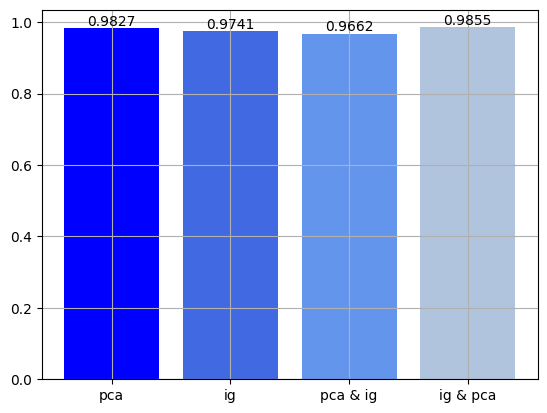

In [77]:
import matplotlib.pyplot as plt

acc_train = [acc_train_pca, acc_train_ig ,acc_train_pcathenig, acc_train_igthenpca]
title = ["pca", "ig", "pca & ig", "ig & pca"]

colors = ['blue', 'royalblue','cornflowerblue', 'lightsteelblue']
plt.bar(title, acc_train, color = colors)
for i in range(len(acc_train)):
    plt.text(i, acc_train[i] + 0.0001, f'{acc_train[i]:.4f}', ha='center', va='bottom')
plt.grid()
plt.show()

In [78]:
print("train accuracy for model trained on scdataset_pca:", acc_train_pca)
print("train accuracy for model trained on scdataset_ig:", acc_train_ig)
print("train accuracy for model trained on scdataset_pcathenig_augmented:", acc_train_pcathenig)
print("train accuracy for model trained on scdataset_igthenpca_augmented:", acc_train_igthenpca)

train accuracy for model trained on scdataset_pca: 0.982731739582349
train accuracy for model trained on scdataset_ig: 0.9740621751866201
train accuracy for model trained on scdataset_pcathenig_augmented: 0.9661721629027686
train accuracy for model trained on scdataset_igthenpca_augmented: 0.985542851743362


test_data accuracy:

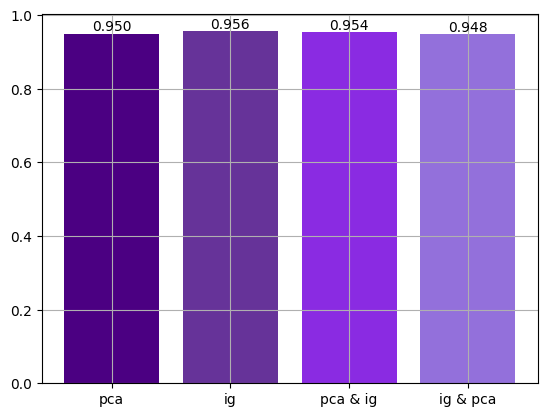

In [79]:
acc_test = [acc_test_pca, acc_test_ig,acc_test_pcathenig, acc_test_igthenpca]
title = ["pca", "ig", "pca & ig", "ig & pca"]

colors = ['indigo','rebeccapurple', 'blueviolet', 'mediumpurple']
plt.bar(title, acc_test, color = colors)
for i in range(len(acc_test)):
    plt.text(i, acc_test[i] + 0.0001, f'{acc_test[i]:.3f}', ha='center', va='bottom')
plt.grid()
plt.show()

In [80]:
print("test accuracy for model trained on scdataset_pca", acc_test_pca)
print("test accuracy for model trained on scdataset_ig:", acc_test_ig)
print("test accuracy for model trained on scdataset_pcathenig_augmented:", acc_test_pcathenig)
print("test accuracy for model trained on scdataset_igthenpca_augmented:", acc_test_igthenpca)

test accuracy for model trained on scdataset_pca 0.9497307001795332
test accuracy for model trained on scdataset_ig: 0.9560616082396296
test accuracy for model trained on scdataset_pcathenig_augmented: 0.9536993291127279
test accuracy for model trained on scdataset_igthenpca_augmented: 0.9482188415383161


loss:

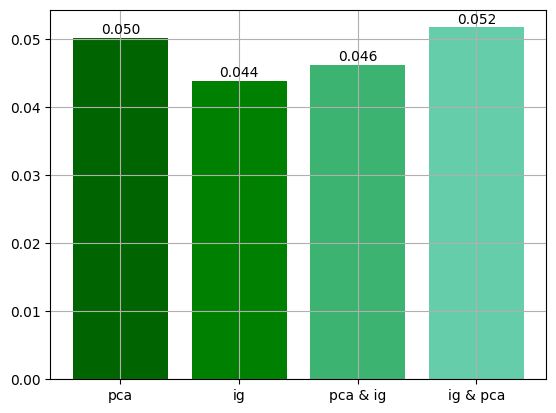

In [81]:
loss = [loss_pca, loss_ig, loss_pcathenig, loss_igthenpca]
title = ["pca", "ig", "pca & ig", "ig & pca"]

colors = ['darkgreen', 'green','mediumseagreen','mediumaquamarine']
plt.bar(title, loss, color = colors)

for i in range(len(loss)):
    plt.text(i, loss[i] + 0.0001, f'{loss[i]:.3f}', ha='center', va='bottom')

plt.grid()
plt.show()

In [82]:

print("loss for model trained on scdataset_pca:", loss_pca)
print("loss for model trained on scdataset_ig:", loss_ig)
print("loss for model trained on scdataset_pcathenig_augmented:", loss_pcathenig)
print("loss for model trained on scdataset_igthenpca_augmented:", loss_igthenpca)

loss for model trained on scdataset_pca: 0.05026929982046679
loss for model trained on scdataset_ig: 0.043938391760370406
loss for model trained on scdataset_pcathenig_augmented: 0.04630067088727204
loss for model trained on scdataset_igthenpca_augmented: 0.05178115846168383


precision:

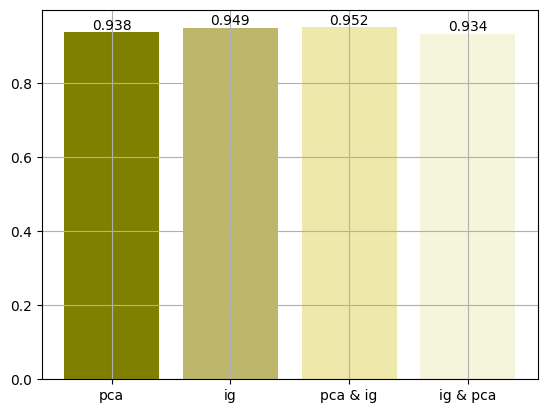

In [83]:
p = [p_pca, p_ig, p_pcathenig, p_igthenpca]
title = ["pca", "ig", "pca & ig", "ig & pca"]

colors = ['olive', 'darkkhaki', 'palegoldenrod', 'beige']
plt.bar(title, p, color = colors)
for i in range(len(p)):
    plt.text(i, p[i] + 0.0001, f'{p[i]:.3f}', ha='center', va='bottom')
plt.grid()
plt.show()

In [84]:
print("precision for model trained on scdataset_pca:", p_pca)
print("precision for model trained on scdataset_ig:", p_ig)
print("precision for model trained on scdataset_pcathenig_augmented:", p_pcathenig)
print("precision for model trained on scdataset_igthenpca_augmented:", p_igthenpca)

precision for model trained on scdataset_pca: 0.937984496124031
precision for model trained on scdataset_ig: 0.9491682070240296
precision for model trained on scdataset_pcathenig_augmented: 0.9516466780887112
precision for model trained on scdataset_igthenpca_augmented: 0.9341571375876061


recall:

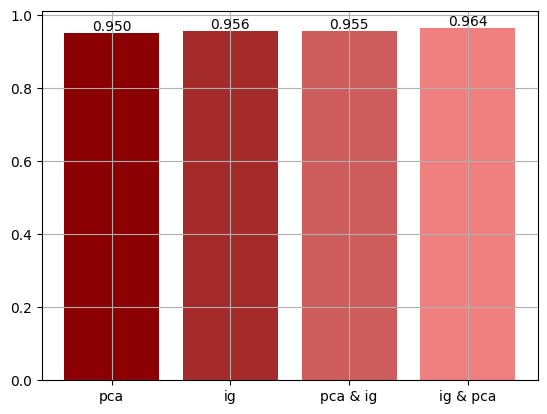

In [ ]:
r = [ r_pca, r_ig, r_pcathenig, r_igthenpca]
title = ["pca", "ig", "pca & ig", "ig & pca"]

colors = ['darkred', 'brown', 'indianred','lightcoral']
plt.bar(title, r, color = colors)
for i in range(len(r)):
    plt.text(i, r[i] + 0.0001, f'{r[i]:.3f}', ha='center', va='bottom')
plt.grid()
plt.show()

In [86]:
print("recall for model trained on scdataset_pca:", r_pca)
print("recall for model trained on scdataset_ig:", r_ig)
print("recall for model trained on scdataset_pcathenig_augmented:", r_pcathenig)
print("recall for model trained on scdataset_igthenpca_augmented:", r_igthenpca)

recall for model trained on scdataset_pca: 0.9628647214854111
recall for model trained on scdataset_ig: 0.964319248826291
recall for model trained on scdataset_pcathenig_augmented: 0.9549188156638013
recall for model trained on scdataset_igthenpca_augmented: 0.9636605783866058


f1_score:

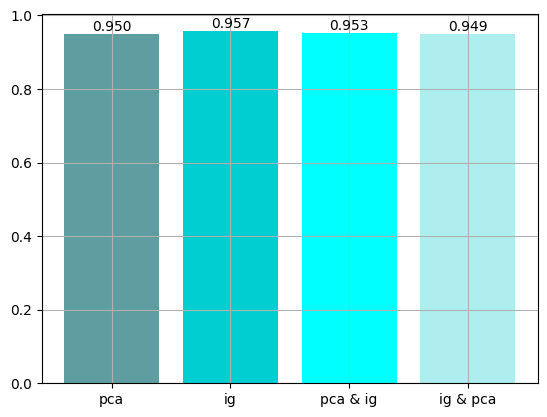

In [87]:
f1 = [f1_pca, f1_ig, f1_pcathenig, f1_igthenpca]
title = ["pca", "ig", "pca & ig", "ig & pca"]

colors = ['cadetblue', 'darkturquoise', 'cyan','paleturquoise']
plt.bar(title, f1, color = colors)
for i in range(len(f1)):
    plt.text(i, f1[i] + 0.0001, f'{f1[i]:.3f}', ha='center', va='bottom')
plt.grid()
plt.show()

In [88]:
print("f1_score for model trained on scdataset_pca:", f1_pca)
print("f1_score for model trained on scdataset_ig:", f1_ig)
print("f1_score for model trained on scdataset_pcathenig_augmented:", f1_pcathenig)
print("f1_score for model trained on scdataset_igthenpca_augmented:", f1_igthenpca)

f1_score for model trained on scdataset_pca: 0.9502617801047121
f1_score for model trained on scdataset_ig: 0.9566837447601304
f1_score for model trained on scdataset_pcathenig_augmented: 0.9532799389778794
f1_score for model trained on scdataset_igthenpca_augmented: 0.9486795280014985


roc_auc:

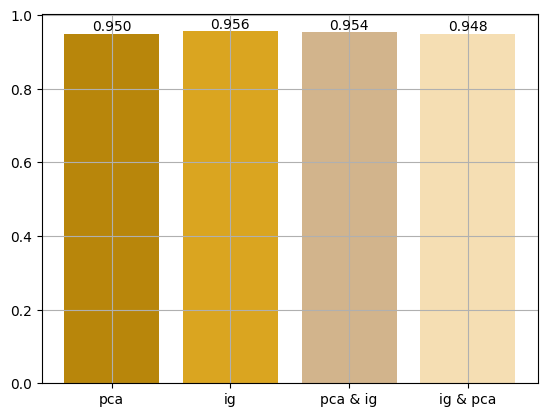

In [89]:
ra = [ra_pca, ra_ig, ra_pcathenig, ra_igthenpca]
title = ["pca", "ig", "pca & ig", "ig & pca"]

colors = ['darkgoldenrod', 'goldenrod', 'tan','wheat']
plt.bar(title, ra, color = colors)
for i in range(len(ra)):
    plt.text(i, ra[i] + 0.0001, f'{ra[i]:.3f}', ha='center', va='bottom')
plt.grid()
plt.show()

In [90]:
print("roc_auc for model trained on scdataset_pca:", ra_pca)
print("roc_auc for model trained on scdataset_ig:", ra_ig)
print("roc_auc for model trained on scdataset_pcathenig_augmented:", ra_pcathenig)
print("roc_auc for model trained on scdataset_igthenpca_augmented:", ra_igthenpca)

roc_auc for model trained on scdataset_pca: 0.9497641232309243
roc_auc for model trained on scdataset_ig: 0.9560089967980828
roc_auc for model trained on scdataset_pcathenig_augmented: 0.9537122126187368
roc_auc for model trained on scdataset_igthenpca_augmented: 0.9483217478003989


# conclusion:

| Metric         | PCA        | IG          | PCA & IG | IG & PCA |
|----------------|------------------------|------------------------|-------------------------------|---------------------------------|
| **Train Accuracy**  | 0.9828                 | 0.9741                 | 0.9653                        | 0.9830                          |
| **Test Accuracy**   | 0.9579                 | 0.9537                 | 0.9596                        | 0.9496                          |
| **Loss**            | 0.0420                 | 0.0463                 | 0.0404                        | 0.0504                          |
| **Precision**       | 0.9506                 | 0.9402                 | 0.9530                        | 0.9358                          |
| **Recall**          | 0.9647                 | 0.9670                 | 0.9661                        | 0.9648                          |
| **F1 Score**        | 0.9576                 | 0.9534                 | 0.9595                        | 0.9501                          |
| **ROC AUC**         | 0.9581                 | 0.9540                 | 0.9596                        | 0.9497                          |
